In [1]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import pandas as pd
from tqdm.notebook import tqdm
import os, re, math

In [2]:
output_dir = "./paper_plots"

def setup_plt():

    fig_width_pt = 220  # Get this from LaTeX using \showthe
    inches_per_pt = 1.0 / 72.27 * 2  # Convert pt to inches
    golden_mean = ((np.math.sqrt(5) - 1.0) / 2.0) * .8  # Aesthetic ratio
    fig_width = fig_width_pt * inches_per_pt  # width in inches
    fig_height = (fig_width * golden_mean)  # height in inches
    fig_size =  [fig_width, fig_height]

    plt_params = {
        'backend': 'ps',
        'axes.labelsize': 20,
        'legend.fontsize': 16,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18,
        'font.size': 18,
        'figure.figsize': fig_size,
        'font.family': 'Times New Roman'
    }

    plt.rcParams.update(plt_params)
    plt.rc('pdf', fonttype=42)  # IMPORTANT to get rid of Type 3


,n_weights,fixed_point_repr,l2_clientlarge_wellformed_ms,l8_clientlarge_wellformed_ms,l8p_clientlarge_wellformed_ms,l2_clientlarge_wellformed_ms_std,l8_clientlarge_wellformed_ms_std,l8p_clientlarge_wellformed_ms_std,l2_server_wellformed_ms,l8_server_wellformed_ms,...,l8_server_range_ms_std,l8p_server_range_ms_std,l2_server_caggregation_ms,l8_server_caggregation_ms,l8p_server_caggregation_ms,l2_server_caggregation_ms_std,l8_server_caggregation_ms_std,l8p_server_caggregation_ms_std,server_log2reconstruct_ms,server_log2reconstruct_ms_std
1,32768,16,1896.75,1183.25,1183.25,9.069179,1.500000,1.500000,981.00,596.25,...,28.907488,15.649814,161.25,161.25,161.25,0.500000,0.500000,0.500000,52179.25,188.577791
2,131072,16,7603.50,4740.50,4740.50,3.109126,2.516611,2.516611,3917.50,2385.50,...,112.558477,15.649814,645.50,645.50,645.50,0.577350,0.577350,0.577350,209138.00,605.898231
3,262144,16,15214.75,9470.50,9470.50,22.306576,7.724420,7.724420,7864.75,4775.00,...,112.763659,15.649814,1289.75,1289.75,1289.75,1.707825,1.707825,1.707825,415567.75,2495.479830
4,524288,16,31224.00,18924.75,18924.75,71.865615,23.528352,23.528352,16242.25,9556.00,...,259.814219,15.649814,2582.50,2582.50,2582.50,1.290994,1.290994,1.290994,813496.25,723.176039


Server Overall - Discrete Log Reconstruction:


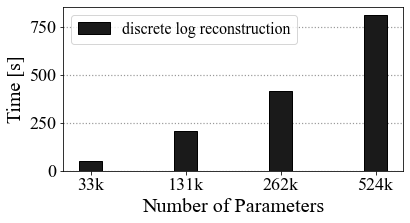


Server per Client - Zero Knowledge Proofs + Aggregation:


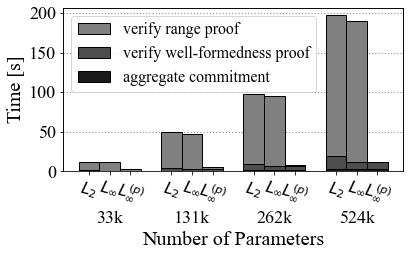


Client Large - Zero Knowledge Proofs:


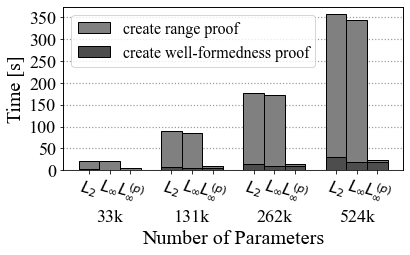

In [3]:

# build benchmarks

cagg_config = {
    "server_label": "aggregate commitment",
    "color": "0.1"
}
wellformed_config = {
    "client_label": "create well-formedness proof",
    "server_label": "verify well-formedness proof",
    "color": "0.3"
}
range_config = {
    "client_label": "create range proof",
    "server_label": "verify range proof",
    "color": "0.5"
}



def extract(filename, pattern, label, data_dir, fixed_point_repr=None):
    # pattern group(1) represents fixed_point_repr
    # pattern group(2) represents n_weights

    lst = []
    match = re.search(pattern, filename, re.IGNORECASE)
    if match:
        # extract the weight parameter and the fp-repr
        group1 = int(match.group(1))

        if fixed_point_repr is None:
            fixed_point_repr = group1
            n_weights = int(match.group(2))
        else:
            fixed_point_repr = fixed_point_repr
            n_weights = group1

        
        # read the benchmark result file
        with open(f"{data_dir}/{filename}", "r") as f:
            lines = f.readlines()
            results =  [int(x) for x in lines]
        
        # go through results and write dicts 
        for i, result in enumerate(results):
            d = {
                "repetition": i,
                "fixed_point_repr" : fixed_point_repr,
                "n_weights": n_weights,
                label: result
            }               

            lst.append(d)
    
    return lst
    


def build_df_mbench_computation():

    data_dir = "./../robust-secure-aggregation/benchmarks_paper/large"

    cmachine = "clientlarge" # clientsmall

    # 1st loop over all files in folder
    l1 = []
    l2 = []
    l3 = []
    l4 = []
    l5 = []
    l6 = []
    l7 = []
    l8 = []
    l9 = []
    l10 = []

    for filename in os.listdir(data_dir):

        # extract randproof
        pattern = "create-paper-randproof-([0-9]+)-([0-9]+)-.*.bench"
        lst1 = extract(filename=filename, pattern=pattern, label="create_randproof_ms", data_dir=data_dir)
        l1 += lst1

        pattern = "verify-paper-randproof-([0-9]+)-([0-9]+)-.*.bench"
        lst2 = extract(filename=filename, pattern=pattern, label="verify_randproof_ms", data_dir=data_dir)
        l2 += lst2

        # extract rangeproof
        pattern = "create-paper-rangeproof-([0-9]+)-[0-9]+-([0-9]+)-.*.bench"
        lst3 = extract(filename=filename, pattern=pattern, label="create_rangeproof_ms", data_dir=data_dir)
        l3 += lst3

        pattern = "verify-paper-rangeproof-([0-9]+)-[0-9]+-([0-9]+)-.*.bench"
        lst4 = extract(filename=filename, pattern=pattern, label="verify_rangeproof_ms", data_dir=data_dir)
        l4 += lst4

        # extract rangeproof l2
        pattern = "create-paper-rangeproof-l2-([0-9]+)-[0-9]+-([0-9]+)-.*.bench"
        lst5 = extract(filename=filename, pattern=pattern, label="create_rangeproofl2_ms", data_dir=data_dir)
        l5 += lst5

        pattern = "verify-paper-rangeproof-l2-([0-9]+)-[0-9]+-([0-9]+)-.*.bench"
        lst6 = extract(filename=filename, pattern=pattern, label="verify_rangeproofl2_ms", data_dir=data_dir)
        l6 += lst6

        # extract squarerandproof
        pattern = "create-paper-squarerandproof-([0-9]+)-([0-9]+)-.*.bench"
        lst7 = extract(filename=filename, pattern=pattern, label="create_squarerandproof_ms", data_dir=data_dir)
        l7 += lst7

        pattern = "verify-paper-squarerandproof-([0-9]+)-([0-9]+)-.*.bench"
        lst8 = extract(filename=filename, pattern=pattern, label="verify_squarerandproof_ms", data_dir=data_dir)
        l8 += lst8

        # extract discrete log
        pattern = "bench_paper_dlog2-([0-9]+)-16-([0-9]+)-.*.bench"
        lst9 = extract(filename=filename, pattern=pattern, label="dlog2_ms", data_dir=data_dir)
        l9 += lst9

        # extract el gamal addition
        pattern = "bench_paper_addelgamal-([0-9]+)-.*.bench"
        lst10 = extract(filename=filename, pattern=pattern, label="elgamal_add_ms", data_dir=data_dir, fixed_point_repr=16)
        l10 += lst10



    # Combine Data from Different Experiments in separate Columns
    df = pd.DataFrame(l1)
    df = df.merge(pd.DataFrame(l2), how="outer")
    df = df.merge(pd.DataFrame(l3), how="outer")
    df = df.merge(pd.DataFrame(l4), how="outer")
    df = df.merge(pd.DataFrame(l5), how="outer")
    df = df.merge(pd.DataFrame(l6), how="outer")
    df = df.merge(pd.DataFrame(l7), how="outer")
    df = df.merge(pd.DataFrame(l8), how="outer")
    df = df.merge(pd.DataFrame(l9), how="outer")
    df = df.merge(pd.DataFrame(l10), how="outer")

    df = df.sort_values(["fixed_point_repr", "n_weights", "repetition"])


    # Aggregate Repetitions into Mean and variance
    df = df.groupby(["fixed_point_repr", "n_weights"], as_index=False).agg({
        'create_randproof_ms':['mean', 'var', 'count'],
        'verify_randproof_ms':['mean', 'var', 'count'],
        'create_rangeproof_ms':['mean', 'var', 'count'],
        'verify_rangeproof_ms':['mean', 'var', 'count'],
        'create_rangeproofl2_ms':['mean', 'var', 'count'],
        'verify_rangeproofl2_ms':['mean', 'var', 'count'],
        'create_squarerandproof_ms':['mean', 'var', 'count'],
        'verify_squarerandproof_ms':['mean', 'var', 'count'],
        'dlog2_ms': ['mean', 'var', 'count'],
        'elgamal_add_ms': ['mean', 'var', 'count']
    })

    # convert to flat df
    df.columns = ['_'.join(tup).rstrip('_') for tup in df.columns.values]

    # Construct relevant metrics

    # client wellformedness
    df[f"l2_{cmachine}_wellformed_ms"] = df["create_squarerandproof_ms_mean"]
    df[f"l8_{cmachine}_wellformed_ms"] = df["create_randproof_ms_mean"]
    df[f"l8p_{cmachine}_wellformed_ms"] = df["create_randproof_ms_mean"]

    df[f"l2_{cmachine}_wellformed_ms_std"] = np.sqrt(df["create_squarerandproof_ms_var"])
    df[f"l8_{cmachine}_wellformed_ms_std"] = np.sqrt(df["create_randproof_ms_var"])
    df[f"l8p_{cmachine}_wellformed_ms_std"] = np.sqrt(df["create_randproof_ms_var"])
    
    # server wellformedness
    df["l2_server_wellformed_ms"] = df["verify_squarerandproof_ms_mean"]
    df["l8_server_wellformed_ms"] = df["verify_randproof_ms_mean"]
    df["l8p_server_wellformed_ms"] = df["verify_randproof_ms_mean"]

    df["l2_server_wellformed_ms_std"] = np.sqrt(df["verify_squarerandproof_ms_var"])
    df["l8_server_wellformed_ms_std"] = np.sqrt(df["verify_randproof_ms_var"])
    df["l8p_server_wellformed_ms_std"] = np.sqrt(df["verify_randproof_ms_var"])

    # client range
    df[f"l2_{cmachine}_range_ms"] = df["create_rangeproofl2_ms_mean"] + df["create_rangeproof_ms_mean"]
    df[f"l8_{cmachine}_range_ms"] = df["create_rangeproof_ms_mean"]
    df[f"l8p_{cmachine}_range_ms"] = df[df["n_weights"] == 8192]["create_rangeproof_ms_mean"].values[0]

    df[f"l2_{cmachine}_range_ms_std"] = np.sqrt(df["create_rangeproofl2_ms_var"] + df["create_rangeproof_ms_var"])
    df[f"l8_{cmachine}_range_ms_std"] = np.sqrt(df["create_rangeproof_ms_var"])
    df[f"l8p_{cmachine}_range_ms_std"] = np.sqrt(df[df["n_weights"] == 8192]["create_rangeproof_ms_var"].values[0])

    # server range
    df["l2_server_range_ms"] = df["verify_rangeproofl2_ms_mean"] + df["verify_rangeproof_ms_mean"]
    df["l8_server_range_ms"] = df["verify_rangeproof_ms_mean"]
    df["l8p_server_range_ms"] = df[df["n_weights"] == 8192]["verify_rangeproof_ms_mean"].values[0]

    df["l2_server_range_ms_std"] = np.sqrt(df["verify_rangeproofl2_ms_var"] + df["verify_rangeproof_ms_var"])
    df["l8_server_range_ms_std"] = np.sqrt(df["verify_rangeproof_ms_var"])
    df["l8p_server_range_ms_std"] = np.sqrt(df[df["n_weights"] == 8192]["verify_rangeproof_ms_var"].values[0])

    # el gamal aggregation
    df["l2_server_caggregation_ms"] = df["elgamal_add_ms_mean"]
    df["l8_server_caggregation_ms"] = df["elgamal_add_ms_mean"]
    df["l8p_server_caggregation_ms"] = df["elgamal_add_ms_mean"]

    df["l2_server_caggregation_ms_std"] = np.sqrt(df["elgamal_add_ms_var"])
    df["l8_server_caggregation_ms_std"] = np.sqrt(df["elgamal_add_ms_var"])
    df["l8p_server_caggregation_ms_std"] = np.sqrt(df["elgamal_add_ms_var"])

    # log2 reconstruction
    df["server_log2reconstruct_ms"] = df["dlog2_ms_mean"]
    df["server_log2reconstruct_ms_std"] = np.sqrt(df["dlog2_ms_var"])


    # filter out the probabilistic checking
    df = df[df["n_weights"]!=8192]

    # project to new columns
    cols = ["n_weights", "fixed_point_repr"]
    new_cols = [col for col in df.columns.values if col.startswith("l2_") or col.startswith("l8_") or col.startswith("l8p_")]
    cols += new_cols 
    cols += ["server_log2reconstruct_ms", "server_log2reconstruct_ms_std"]
    df = df[cols]


    # TODO [nku] also load data from small clients

    return df


def format_plot_computation(ax, ind, width, group_labels):
    ##########################
    # General Format         
    ##########################
    #ax.set_title("Hello World")

    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
        ax.legend(*zip(*unique), loc="best") # 'best', 'upper right', 'upper left', 'lower left', 
                                                # 'lower right', 'right', 'center left',  'center right',
                                                # 'lower center', 'upper center', 'center'
    legend_without_duplicate_labels(ax)

    ax.grid(True, axis="y", linestyle=':', color='0.6', zorder=0, linewidth=1.2)
    
    ##########################
    # Y - Axis Format
    ##########################
    ax.set_ylim(ymin=0, ymax=None)
    ax.set_ylabel("Time [s]")

    ymax = ax.get_ylim()[1]
    ax.set_yticks(np.arange(0, ymax, 50))
    
    ##########################
    # X - Axis Format
    ##########################

    # add 1st axis for norm (l2, l8, l8p)
    xticks = np.append(ind, ind-width, axis=0)
    xticks = np.append(xticks, ind+width, axis=0)
    xticks = np.sort(xticks)
    labels = 4 * ["$L_2$", "$L_{\infty}$", "$L_{\infty}^{(p)}$"]
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels, fontsize=16, rotation=345)


    # add 2nd axis for number of parameters
    ax2 = ax.twiny()
    ax2.set_xticks(ind)
    # $(2^{{{int(math.log(n_weights,2))}}})$
    group_labels = [f"{round(n_weights/1000)}k" for n_weights in group_labels]
    ax2.set_xticklabels(group_labels, rotation=345)
    ax2.xaxis.set_ticks_position('bottom') 
    ax2.xaxis.set_label_position('bottom')
    ax2.spines['bottom'].set_position(('outward', 36))
    
    ax2.set_xlabel('Number of Parameters')
    ax2.set_xlim(ax.get_xlim())
    ax2.tick_params(axis='both', which='both', length=0)
    ax2.spines['bottom'].set_visible(False)
 

def build_fig_mbench_computation_server_perclient_zkp(df, name="mbench_computation_server_perclient_zkp"):
    setup_plt()


    with PdfPages(f"{output_dir}/{name}.pdf") as pdf:
   
        fig, ax = plt.subplots()

        ##########################
        # Draw all the lines         
        ##########################

        # build ind, width
        ind = np.arange(0, len(df.index)) * 1.2
        width = 0.3  # the width of the bars
    

        # build the barcharts

        for offset, norm in zip([-width, 0, width], ["l2", "l8", "l8p"]):

            ax.bar(ind+offset, df[f"{norm}_server_range_ms"] / 1000, width, 
                        bottom=df[f"{norm}_server_wellformed_ms"] / 1000, label=range_config["server_label"], 
                        color=range_config["color"], edgecolor="black", zorder=2)

            ax.bar(ind+offset, df[f"{norm}_server_wellformed_ms"] / 1000, width, 
                        bottom=df[f"{norm}_server_caggregation_ms"] / 1000, label=wellformed_config["server_label"], 
                        color=wellformed_config["color"], edgecolor="black", zorder=2)

            ax.bar(ind+offset, df[f"{norm}_server_caggregation_ms"] / 1000, width, 
                        bottom=None, label=cagg_config["server_label"], 
                        color=cagg_config["color"], edgecolor="black", zorder=2)
            
            

        # format the computation barchart
        format_plot_computation(ax, ind, width, df["n_weights"])

        
        pdf.savefig(bbox_inches='tight', pad_inches=0)
        plt.close()
    return fig


def build_fig_mbench_computation_client_zkp(df, clientsuffix="small"):

    machine = f"client{clientsuffix}"
    name= f"mbench_computation_{machine}_zkp"

    setup_plt()

    with PdfPages(f"{output_dir}/{name}.pdf") as pdf:
   
        fig, ax = plt.subplots()

        ##########################
        # Draw all the lines         
        ##########################

        # build ind, width
        ind = np.arange(0, len(df.index)) * 1.2
        width = 0.3  # the width of the bars
    

        # build the barcharts

        for offset, norm in zip([-width, 0, width], ["l2", "l8", "l8p"]):

            ax.bar(ind+offset, df[f"{norm}_{machine}_range_ms"] / 1000, width, 
                        bottom=df[f"{norm}_{machine}_wellformed_ms"] / 1000, label=range_config["client_label"], 
                        color=range_config["color"], edgecolor="black", zorder=2)

            ax.bar(ind+offset, df[f"{norm}_{machine}_wellformed_ms"] / 1000, width, 
                        bottom=None, label=wellformed_config["client_label"], 
                        color=wellformed_config["color"], edgecolor="black", zorder=2)

            
            

        # format the computation barchart
        format_plot_computation(ax, ind, width, df["n_weights"])

        
        pdf.savefig(bbox_inches='tight', pad_inches=0)
        plt.close()
    return fig

def build_fig_mbench_computation_server_dlog(df, name="mbench_computation_server_dlog"):

    label = "discrete log reconstruction"
    color = "0.1"
    setup_plt()

    with PdfPages(f"{output_dir}/{name}.pdf") as pdf:
   
        fig, ax = plt.subplots()

        ##########################
        # Draw all the lines         
        ##########################

        # build ind, width
        ind = np.arange(0, len(df.index)) * 1.2
        width = 0.3  # the width of the bars

        ax.bar(ind, df["server_log2reconstruct_ms"] / 1000, width, 
                        label=label, color=color, edgecolor="black", zorder=2)


        ##########################
        # General Format         
        ##########################
        #ax.set_title("Hello World")
        ax.legend(loc="best")   # 'best', 'upper right', 'upper left', 'lower left', 
                                # 'lower right', 'right', 'center left',  'center right', 
                                # 'lower center', 'upper center', 'center'
        ax.grid(True, axis="y", linestyle=':', color='0.6', zorder=0, linewidth=1.2)


        ##########################
        # Y - Axis Format
        ##########################
        ax.set_ylim(ymin=0, ymax=None)
        ax.set_ylabel("Time [s]")
        #ax.set_yticks(yticks)
        #ax.set_yticklabels(labels, fontsize=16, rotation=345)


        ##########################
        # X - Axis Format
        ##########################
        #ax.set_xlim(xmin=0, xmax=None)
        ax.set_xlabel("Number of Parameters")
        ax.set_xticks(ind)
        labels = [f"{round(x/1000)}k" for x in df["n_weights"]]
        ax.set_xticklabels(labels)

        #labels = 4 * ["$L_2$", "$L_{\infty}$", "$L_{\infty}^{(p)}$"]
        #ax.set_xticks(xticks)
        #ax.set_xticklabels(labels, fontsize=16, rotation=345)

        pdf.savefig(bbox_inches='tight', pad_inches=0)
        plt.close()
    return fig


df = build_df_mbench_computation()
display(df)

fig_mbench_computation_server_dlog = build_fig_mbench_computation_server_dlog(df)
print("Server Overall - Discrete Log Reconstruction:")
display(fig_mbench_computation_server_dlog)

fig_mbench_computation_server_perclient_zkp = build_fig_mbench_computation_server_perclient_zkp(df)
print("\nServer per Client - Zero Knowledge Proofs + Aggregation:")
display(fig_mbench_computation_server_perclient_zkp)

fig_mbench_computation_clientlarge_zkp = build_fig_mbench_computation_client_zkp(df, "large")
print("\nClient Large - Zero Knowledge Proofs:")
display(fig_mbench_computation_clientlarge_zkp)

# TODO add the plot for the small
# print("\nClient Small - Zero Knowledge Proofs:")
# fig_mbench_computation_clientsmall_zkp = build_fig_mbench_computation_client_zkp(df, "small")
# display(fig_mbench_computation_clientsmall_zkp)





L8 Bandwidth (infinity norm):


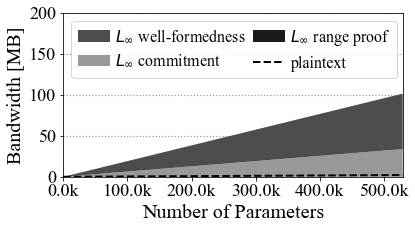


L2 Bandwidth:


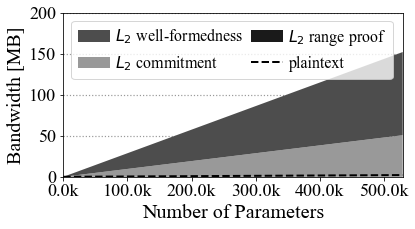

,n_weights,proving_bit_range,n_vector_segments,group_element_bytes,scalar_bytes,plaintext_bytes,l8_commitment_bytes,l2_commitment_bytes,l8_wellformedness_bytes,l2_wellformedness_bytes,l8_range_proof_bytes,l2_range_proof_bytes,l2_total_mb,l8_total_mb
0,1,8,4,32,32,4,64,96,128,192,352.0,736.0,0.001024,0.000544
8,4241,8,4,32,32,16964,271424,407136,542848,814272,1184.0,1568.0,1.222976,0.815456
16,8481,8,4,32,32,33924,542784,814176,1085568,1628352,1248.0,1632.0,2.444160,1.629600
24,12721,8,4,32,32,50884,814144,1221216,1628288,2442432,1248.0,1632.0,3.665280,2.443680
32,16961,8,4,32,32,67844,1085504,1628256,2171008,3256512,1312.0,1696.0,4.886464,3.257824
40,21201,8,4,32,32,84804,1356864,2035296,2713728,4070592,1312.0,1696.0,6.107584,4.071904
48,25441,8,4,32,32,101764,1628224,2442336,3256448,4884672,1312.0,1696.0,7.328704,4.885984
56,29681,8,4,32,32,118724,1899584,2849376,3799168,5698752,1312.0,1696.0,8.549824,5.700064
64,33921,8,4,32,32,135684,2170944,3256416,4341888,6512832,1376.0,1760.0,9.771008,6.514208
72,38161,8,4,32,32,152644,2442304,3663456,4884608,7326912,1376.0,1760.0,10.992128,7.328288


In [4]:
# Bandwidth

def build_df_bandwidth(max_n_weights=10**6):
    
    n_steps = 1000
    step_size = int(max_n_weights / 1000)

    message_sizes = []
    for n_weights in range(1, max_n_weights, step_size):
        d = get_message_size(n_weights)
        message_sizes.append(d)

    df = pd.DataFrame(message_sizes)

    df["l2_total_mb"] = (df["l2_commitment_bytes"] + df["l2_wellformedness_bytes"] + df["l2_range_proof_bytes"]) * 1e-6
    df["l8_total_mb"] = (df["l8_commitment_bytes"] + df["l8_wellformedness_bytes"] + df["l8_range_proof_bytes"]) * 1e-6

    return df

def get_message_size(n_weights, proving_bit_range=8, n_vector_segments=4, group_element_bytes=32, scalar_bytes=32, plaintext_weight_bytes=4):    

    # n_weights: D
    # proving_bit_range: n
    # n_vector_segments: p

    d = {
        "n_weights": n_weights,
        "proving_bit_range": proving_bit_range,
        "n_vector_segments": n_vector_segments,
        "group_element_bytes": group_element_bytes,
        "scalar_bytes": scalar_bytes
    }


    d["plaintext_bytes"] = plaintext_weight_bytes * n_weights

    

    ###############################################################
    ## Commitments                                               ##
    ###############################################################

    # L8 / L8p
    d["l8_commitment_bytes"] = n_weights * 2 * group_element_bytes

    # L2: requires additional commitment to the squared parameters 
    # (pederson commitment => 1 group element per weight)
    d["l2_commitment_bytes"] = d["l8_commitment_bytes"] + n_weights * group_element_bytes
   
    
    ###############################################################
    ## Well-Formedness Proof                                     ##
    ###############################################################

    # L8 / L8p
    d["l8_wellformedness_bytes"] = (2 * scalar_bytes + 2 * group_element_bytes) * n_weights

    # L2: requires one additional scalar and group element for the square relation proof
    d["l2_wellformedness_bytes"] = d["l8_wellformedness_bytes"] + (scalar_bytes + group_element_bytes) * n_weights


    ###############################################################
    ## Range Proofs                                              ##
    ###############################################################   

    def next_pow(x):
        return pow(2, math.ceil(math.log(x, 2)))

    # L8 / L8p
    n_group_elements = 2 * (math.log(proving_bit_range, 2) + math.log(next_pow(n_weights / n_vector_segments), 2)) + 4
    n_scalars = 5
    d["l8_range_proof_bytes"] = n_group_elements * group_element_bytes + n_scalars * scalar_bytes

    # L2: requires additional group elements and scalars to proof that l2 norm is in range
    n_group_elements_additional  = math.log(proving_bit_range, 2) + 4
    n_scalars_additional = 5
    d["l2_range_proof_bytes"] = d["l8_range_proof_bytes"] + n_group_elements_additional * group_element_bytes + n_scalars_additional * scalar_bytes

    return d



def build_fig_mbench_bandwidth_perclient(df, norm):

    name = f"mbench_bandwidth_perclient_{norm}"

    if norm not in ["l2", "l8"]:
        raise ValueError("unknown norm")

    if norm == "l2":
        label_prefix = "$L_2$"
    else:
        label_prefix = "$L_{\infty}$"

    
    setup_plt()

    with PdfPages(f"{output_dir}/{name}.pdf") as pdf:
   
        fig, ax = plt.subplots()

        ##########################
        # Draw all the lines         
        ##########################

        ax.plot(df["n_weights"], df["plaintext_bytes"]*1e-6, label="plaintext", color="0.0", linestyle="--", linewidth=2)

        ax.stackplot(df["n_weights"], 
                    df[norm + "_commitment_bytes"]*1e-6, 
                    df[norm + "_wellformedness_bytes"]*1e-6, 
                    df[norm + "_range_proof_bytes"]*1e-6, 
                    colors=["0.6", "0.3", "0.1"], labels=[label_prefix + " commitment", label_prefix + " well-formedness", label_prefix + " range proof"], zorder=2)



        ##########################
        # General Format         
        ##########################
        #ax.set_title("Hello World")

        handles, labels = plt.gca().get_legend_handles_labels()
        order = [2,1,3,0]

        ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc="upper left", ncol=2, handletextpad=0.3, columnspacing=0.5)   # 'best', 'upper right', 'upper left', 'lower left', 
                                # 'lower right', 'right', 'center left',  'center right', 
                                # 'lower center', 'upper center', 'center'
        ax.grid(True, axis="y", linestyle=':', color='0.6', zorder=0, linewidth=1.2)


        ##########################
        # Y - Axis Format
        ##########################
        ax.set_ylim(ymin=0, ymax=200)
        ax.set_ylabel("Bandwidth [MB]")
        #ax.set_yticks(yticks)
        #ax.set_yticklabels(labels, fontsize=16, rotation=345)


        ##########################
        # X - Axis Format
        ##########################
        ax.set_xlim(xmin=0, xmax=530000)
        ax.set_xlabel("Number of Parameters")

        xlabels = [f"{round(x)}k" if x < 1000 else f"{round(x/1000)}M" for x in ax.get_xticks()/1000]
        ax.set_xticklabels(xlabels)

        pdf.savefig(bbox_inches='tight', pad_inches=0)
        plt.close()
    return fig


df = build_df_bandwidth(max_n_weights=530000)


fig_mbench_bandwidth_perclient_l8 = build_fig_mbench_bandwidth_perclient(df, norm="l8")
print("L8 Bandwidth (infinity norm):")
display(fig_mbench_bandwidth_perclient_l8)

fig_mbench_bandwidth_perclient_l2 = build_fig_mbench_bandwidth_perclient(df, norm="l2")
print("\nL2 Bandwidth:")
display(fig_mbench_bandwidth_perclient_l2)

pd.set_option('display.max_rows', 500)
display(df[df.index % 8 == 0])





Probabilistic Checking:


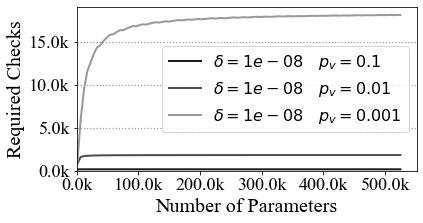

fail_prob_bound=1e-08 	 prob_weights_violating_bound=0.1
(n_weights, n_checks): [(1000, 160), (6290, 173), (11580, 174), (16870, 174), (22160, 175), (27450, 175), (32740, 175), (38030, 175), (43320, 175), (48610, 175), (53900, 175), (59190, 175), (64480, 175), (69770, 175), (75060, 175), (80350, 175), (85640, 175), (90930, 175), (96220, 175), (101510, 175), (106800, 175), (112090, 175), (117380, 175), (122670, 175), (127960, 175), (133250, 175), (138540, 175), (143830, 175), (149120, 175), (154410, 175), (159700, 175), (164990, 175), (170280, 175), (175570, 175), (180860, 175), (186150, 175), (191440, 175), (196730, 175), (202020, 175), (207310, 175), (212600, 175), (217890, 175), (223180, 175), (228470, 175), (233760, 175), (239050, 175), (244340, 175), (249630, 175), (254920, 175), (260210, 175), (265500, 175), (270790, 175), (276080, 175), (281370, 175), (286660, 175), (291950, 175), (297240, 175), (302530, 175), (307820, 175), (313110, 175), (318400, 175), (323690, 175), (328980, 1

In [5]:
# Probabilistic Checking

def detection_prop_hypergeometric(n_weights, n_weights_violating_bound, n_bounds_check):
    # probability that by sampling {n_bounds_check} weights without replacement from all the {n_weights} weights
    # we get k=0 of the {n_weights_violating_bound} weights that violate the bound
    hpd = ss.hypergeom(n_weights, n_weights_violating_bound, n_bounds_check)
    k = 0
    p = hpd.pmf(k)

    # probability that we get at least one of the weights violating the bound
    return 1 - p


def binary_search_nchecks(success_prob_bound, n_weights, n_weights_violating_bound):
    mid = 0
    start = 0
    end = n_weights # 10000 # upper bound
    step = 0
    success = None
    while (start <= end):
        mid = (start + end) // 2
        
        prob = detection_prop_hypergeometric(n_weights=n_weights, n_weights_violating_bound=n_weights_violating_bound, n_bounds_check=mid)
        #print(f"Check mid={mid}  prob={prob}")

        if prob < success_prob_bound:
            # checking {mid} parameters not sufficient => increase the number of checks
            start = mid + 1
        else:
            # checking {mid} parameters, results in success probability above the bound => check if reducing number of checks still works
            success = (mid, prob)
            end = mid - 1

    if success is None:
        raise ValueError("did not find satisfiable number of checks")
    return success

def build_prob_checking_data():
    lines = []

    x_min = 1000
    x_max = 530000

    n_steps = 100
    step_size = int((x_max-x_min)/n_steps)
    
    for fail_prob_bound, linestyle in tqdm(zip([1e-8], ['-'])): #, 1e-9


        success_prob_bound = 1 - fail_prob_bound
        for prob_weights_violating_bound, color in tqdm(zip([0.1, 0.01, 0.001], ['0.1', '0.3','0.6'])):

            labels = range(x_min, x_max, step_size)
            values = []
            for n_weights in tqdm(labels, leave=False):
                n_weights_violating_bound = int(prob_weights_violating_bound * n_weights)
                s = binary_search_nchecks(success_prob_bound=success_prob_bound, n_weights=n_weights, n_weights_violating_bound=n_weights_violating_bound)
                n_checks = s[0]
                values.append(n_checks)
            d = {
                "fail_prob_bound": fail_prob_bound,
                "success_prob_bound": success_prob_bound,
                "prob_weights_violating_bound": prob_weights_violating_bound,
                #"n_weights_violating_bound": n_weights_violating_bound,
                "labels (n_weights)": labels,
                "values (n_checks)": values,
                "color": color,
                "linestyle": linestyle
            }
            lines.append(d)

    return lines

def build_fig_pcheck_num_required_checks(lines, name="pcheck_num_required_checks"):

    setup_plt()

    with PdfPages(f"{output_dir}/{name}.pdf") as pdf:
   
        fig, ax = plt.subplots()

        ##########################
        # Draw all the lines         
        ##########################

        # lineplot
        for line in lines:

            fail_prob_bound = line["fail_prob_bound"]
            prob_weights_violating_bound = line["prob_weights_violating_bound"]
            label = f"$\delta = {fail_prob_bound}$    $p_v = {prob_weights_violating_bound}$"
            plt.plot(line["labels (n_weights)"], line["values (n_checks)"], label=label, color=line["color"], linestyle=line["linestyle"], linewidth=2)

        ##########################
        # General Format         
        ##########################
        #ax.set_title("Hello World")
        ax.legend(loc="best")   # 'best', 'upper right', 'upper left', 'lower left', 
                                # 'lower right', 'right', 'center left',  'center right', 
                                # 'lower center', 'upper center', 'center'
        ax.grid(True, axis="y", linestyle=':', color='0.6', zorder=0, linewidth=1.2)

        ##########################
        # Y - Axis Format
        ##########################
        ax.set_ylim(ymin=0, ymax=None)
        ax.set_ylabel("Required Checks")
        #ax.set_yticks(yticks)
        ylabels = [f"{round(y)}k" for y in ax.get_yticks()/1000]
        ax.set_yticklabels(ylabels)

        ##########################
        # X - Axis Format
        ##########################
        ax.set_xlim(xmin=0, xmax=None)
        ax.set_xlabel("Number of Parameters")
        #ax.set_xticks(xticks)
        xlabels = [f"{round(x)}k" for x in ax.get_xticks()/1000]
        ax.set_xticklabels(xlabels)

        pdf.savefig(bbox_inches='tight', pad_inches=0)
        plt.close()
    return fig



lines = build_prob_checking_data()

fig_pcheck_num_required_checks = build_fig_pcheck_num_required_checks(lines)

print("Probabilistic Checking:")
display(fig_pcheck_num_required_checks)

# print data
for line in lines:
    print(f"fail_prob_bound={line['fail_prob_bound']} \t prob_weights_violating_bound={line['prob_weights_violating_bound']}")

    lst = [(label, value) for label, value in zip(line["labels (n_weights)"], line["values (n_checks)"])]
    
    print(f"(n_weights, n_checks): {lst}")
    print("====================\n")

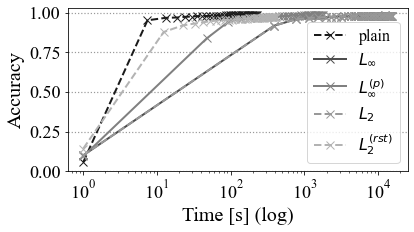

,epoch,loss_u,accuracy_u,time_u,cumtime_u,loss_l8,accuracy_l8,time_l8,cumtime_l8,loss_l8p,...,time_l8p,cumtime_l8p,loss_l2,accuracy_l2,time_l2,cumtime_l2,loss_l2rst,accuracy_l2rst,time_l2rst,cumtime_l2rst
0,0,2.320262,0.0574,1.000000,1.000000,2.336624,0.1002,1.000000,1.000000,2.415536,...,1.000000,1.000000,2.336624,0.1002,1.000000,1.000000,2.574258,0.1428,1.000000,1.000000
1,1,0.172427,0.9516,6.430499,7.430499,0.282723,0.9173,385.998755,386.998755,0.619241,...,46.252870,47.252870,0.282723,0.9173,385.998755,386.998755,0.428086,0.8777,11.307832,12.307832
2,2,0.113188,0.9671,5.622920,13.053419,0.138087,0.9589,387.635573,774.634328,0.187961,...,45.416167,92.669037,0.138087,0.9589,387.635573,774.634328,0.289831,0.9196,10.147186,22.455018
3,3,0.098994,0.9693,5.591158,18.644578,0.113191,0.9672,386.528960,1161.163288,0.133701,...,45.311565,137.980602,0.113191,0.9672,386.528960,1161.163288,0.252063,0.9313,10.108311,32.563329
4,4,0.091006,0.9736,5.601222,24.245800,0.100314,0.9694,386.272138,1547.435426,0.114930,...,44.921979,182.902580,0.100314,0.9694,386.272138,1547.435426,0.230983,0.9394,10.145975,42.709305
5,5,0.084292,0.9753,5.598727,29.844527,0.090484,0.9719,386.959101,1934.394526,0.104646,...,44.254967,227.157548,0.090484,0.9719,386.959101,1934.394526,0.213896,0.9458,10.121239,52.830544
6,6,0.081022,0.9780,5.583597,35.428124,0.087058,0.9738,386.618145,2321.012671,0.096979,...,44.097775,271.255323,0.087058,0.9738,386.618145,2321.012671,0.203135,0.9493,10.180472,63.011016
7,7,0.077538,0.9783,5.581203,41.009326,0.082481,0.9756,386.047554,2707.060225,0.091339,...,44.093392,315.348715,0.082481,0.9756,386.047554,2707.060225,0.194712,0.9528,10.162326,73.173342
8,8,0.073688,0.9789,5.581732,46.591059,0.076003,0.9756,387.906852,3094.967077,0.086673,...,44.021508,359.370222,0.076003,0.9756,387.906852,3094.967077,0.188547,0.9544,10.078571,83.251913
9,9,0.072065,0.9795,5.580852,52.171911,0.076308,0.9764,385.950596,3480.917674,0.081851,...,44.120268,403.490490,0.076308,0.9764,385.950596,3480.917674,0.184577,0.9557,10.140610,93.392523


In [6]:
# End-to-End Plot
from functools import reduce

def build_df_e2e_mnist():
    data_folder = "data/endtoend/"
    csv_schema = ["epoch", "loss", "accuracy", "time"]

    def preprocess(df, suffix):
        # set start timestamp to 0
        df["time"].iloc[0] = 1
        df["cumtime"] = df["time"].cumsum()

        df = df.rename(columns={"loss": f"loss_{suffix}", "accuracy": f"accuracy_{suffix}", "time": f"time_{suffix}", "cumtime": f"cumtime_{suffix}" })

        return df

    df_u = preprocess(pd.read_csv(data_folder + "mnist_plain_baseline.csv", names=csv_schema), suffix="u")
    df_l8 = preprocess(pd.read_csv(data_folder + "mnist_range_old_slow.csv", names=csv_schema), suffix="l8")
    df_l8p = preprocess(pd.read_csv(data_folder + "mnist_range_optim_randproof.csv", names=csv_schema), suffix="l8p")
    df_l2 = preprocess(pd.read_csv(data_folder + "mnist_range_old_slow.csv", names=csv_schema), suffix="l2") # TODO ?
    df_l2rst = preprocess(pd.read_csv(data_folder + "mnist_l2_optim.csv", names=csv_schema), suffix="l2rst") 

    data_frames = [df_u, df_l8, df_l8p, df_l2, df_l2rst]

    
    df = reduce(lambda  left, right: pd.merge(left, right, on=['epoch'], how='outer'), data_frames)

    
    return df


def build_fig_e2e_mnist_time(df, name="e2e_mnist_time"):


    configs = {
        "u": {"label": "plain",                 "color": "0.1", "linestyle": "--", "marker": "x"},
        "l8": {"label": "$L_{\infty}$",         "color": "0.3", "linestyle": "-", "marker": "x"},
        "l8p": {"label": "$L_{\infty}^{(p)}$",  "color": "0.5", "linestyle": "-", "marker": "x"},
        "l2": {"label": "$L_2$",                "color": "0.6", "linestyle": "--", "marker": "x"},
        "l2rst": {"label": "$L_2^{(rst)}$",      "color": "0.7", "linestyle": "--", "marker": "x"}
    }
    setup_plt()

    with PdfPages(f"{output_dir}/{name}.pdf") as pdf:
   
        fig, ax = plt.subplots()

        ##########################
        # Draw all the lines         
        ##########################

        # lineplot
        for suffix in configs.keys():
            values = df[f"accuracy_{suffix}"]
            labels = df[f"cumtime_{suffix}"]
            config = configs[suffix]
            plt.plot(labels, values, label=config["label"], color=config["color"], linestyle=config["linestyle"], marker=config["marker"], linewidth=2, markersize=8)


        ##########################
        # General Format         
        ##########################
        #ax.set_title("Hello World")
        ax.legend(loc="best")   # 'best', 'upper right', 'upper left', 'lower left', 
                                # 'lower right', 'right', 'center left',  'center right', 
                                # 'lower center', 'upper center', 'center'
        ax.grid(True, axis="y", linestyle=':', color='0.6', zorder=0, linewidth=1.2)


        ##########################
        # Y - Axis Format
        ##########################
        ax.set_ylim(ymin=0, ymax=None)
        ax.set_ylabel("Accuracy")
        ax.set_yticks([0,0.25,0.5,0.75,1])
        #ax.set_yticklabels(labels, fontsize=16, rotation=345)


        ##########################
        # X - Axis Format
        ##########################
        #ax.set_xlim(xmin=-30, xmax=1000)
        ax.set_xlabel("Time [s] (log)")
        ax.set_xscale("log")
        #ax.set_xticks(xticks)
        #ax.set_xticklabels(labels, fontsize=16, rotation=345)

        pdf.savefig(bbox_inches='tight', pad_inches=0)
        plt.close()
    return fig


df = build_df_e2e_mnist()
fig_e2e_mnist_time = build_fig_e2e_mnist_time(df)
display(fig_e2e_mnist_time)
display(df)

In [7]:
# Analysis

L8 Bounds:


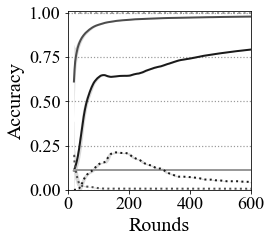

L2 Bounds:


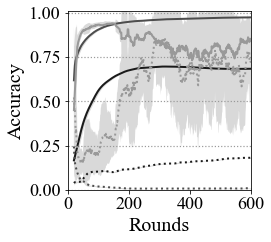

Figure:


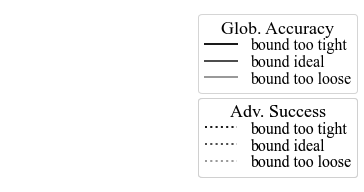

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `norm_accuracy_compare_plot_legend.pdf'.
L8 Bounds:


,Round,e41_clipinf_0_0001_evaluation/test_accuracy,e41_clipinf_0_0001_evaluation/adv_success,e41_clipl2_40_pgd_evaluation/test_accuracy,e41_clipl2_40_pgd_evaluation/adv_success,e41_clipinf_0.005_alpha05_evaluation/test_accuracy,e41_clipinf_0.005_alpha05_evaluation/adv_success,e41_clipl2_3_5_evaluation/test_accuracy,e41_clipl2_3_5_evaluation/adv_success,e41_clipinf_0.0015_evaluation/test_accuracy,...,l2_bound_tootight_advsuccess_std,l2_bound_tootight_testaccuracy_std,l2_bound_ideal_advsuccess,l2_bound_ideal_testaccuracy,l2_bound_ideal_advsuccess_std,l2_bound_ideal_testaccuracy_std,l2_bound_tooloose_advsuccess,l2_bound_tooloose_testaccuracy,l2_bound_tooloose_advsuccess_std,l2_bound_tooloose_testaccuracy_std
9,10,0.102526,0.000000,0.112385,1.000000,0.806927,0.041935,0.808617,0.045161,0.627254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,20,0.156507,0.000000,0.616598,0.567742,0.887076,0.016129,0.890604,0.016129,0.771752,...,0.012642,0.040244,0.245323,0.619387,2.045179e-01,0.192560,0.522581,0.451092,0.397792,0.313743
29,30,0.253452,0.006410,0.869783,0.116129,0.926220,0.009677,0.928326,0.009677,0.826254,...,0.004499,0.044421,0.103871,0.759806,3.599113e-02,0.030861,0.250000,0.771478,0.211700,0.164373
39,40,0.396348,0.051282,0.908289,0.100000,0.943465,0.009677,0.945645,0.006452,0.860401,...,0.005326,0.042120,0.062419,0.802356,1.324980e-02,0.020237,0.164032,0.869855,0.076130,0.032297
49,50,0.488837,0.080711,0.848569,0.480645,0.950519,0.012903,0.951769,0.009677,0.880389,...,0.015104,0.032953,0.049677,0.830961,3.033305e-03,0.013682,0.167258,0.900066,0.083951,0.017646
59,60,0.541471,0.096737,0.897756,0.293548,0.958431,0.006452,0.958382,0.006452,0.896556,...,0.012173,0.025994,0.035968,0.852632,1.194557e-02,0.011544,0.214677,0.907865,0.176581,0.028102
69,70,0.595133,0.102855,0.923574,0.154839,0.961101,0.006452,0.962351,0.006452,0.910665,...,0.005624,0.021067,0.024194,0.870203,1.957990e-03,0.008952,0.216774,0.916046,0.172340,0.029246
79,80,0.619663,0.125874,0.897413,0.338710,0.965021,0.006452,0.964898,0.006452,0.921002,...,0.003047,0.020125,0.022903,0.884461,1.782278e-03,0.008258,0.218710,0.923874,0.119456,0.015688
89,90,0.637070,0.138986,0.888277,0.558065,0.968376,0.006452,0.968523,0.006452,0.926979,...,0.003985,0.018741,0.020645,0.896735,2.432055e-03,0.006713,0.214355,0.928275,0.117914,0.015877
99,100,0.648086,0.151515,0.936312,0.225806,0.970557,0.006452,0.970312,0.006452,0.933177,...,0.003011,0.015459,0.018871,0.906548,2.163937e-03,0.005175,0.208226,0.934200,0.124423,0.012533


L2 Bounds:


,Round,e41_clipinf_0_0001_evaluation/test_accuracy,e41_clipinf_0_0001_evaluation/adv_success,e41_clipl2_40_pgd_evaluation/test_accuracy,e41_clipl2_40_pgd_evaluation/adv_success,e41_clipinf_0.005_alpha05_evaluation/test_accuracy,e41_clipinf_0.005_alpha05_evaluation/adv_success,e41_clipl2_3_5_evaluation/test_accuracy,e41_clipl2_3_5_evaluation/adv_success,e41_clipinf_0.0015_evaluation/test_accuracy,...,l2_bound_tootight_advsuccess_std,l2_bound_tootight_testaccuracy_std,l2_bound_ideal_advsuccess,l2_bound_ideal_testaccuracy,l2_bound_ideal_advsuccess_std,l2_bound_ideal_testaccuracy_std,l2_bound_tooloose_advsuccess,l2_bound_tooloose_testaccuracy,l2_bound_tooloose_advsuccess_std,l2_bound_tooloose_testaccuracy_std
9,10,0.102526,0.000000,0.112385,1.000000,0.806927,0.041935,0.808617,0.045161,0.627254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,20,0.156507,0.000000,0.616598,0.567742,0.887076,0.016129,0.890604,0.016129,0.771752,...,0.012642,0.040244,0.245323,0.619387,2.045179e-01,0.192560,0.522581,0.451092,0.397792,0.313743
29,30,0.253452,0.006410,0.869783,0.116129,0.926220,0.009677,0.928326,0.009677,0.826254,...,0.004499,0.044421,0.103871,0.759806,3.599113e-02,0.030861,0.250000,0.771478,0.211700,0.164373
39,40,0.396348,0.051282,0.908289,0.100000,0.943465,0.009677,0.945645,0.006452,0.860401,...,0.005326,0.042120,0.062419,0.802356,1.324980e-02,0.020237,0.164032,0.869855,0.076130,0.032297
49,50,0.488837,0.080711,0.848569,0.480645,0.950519,0.012903,0.951769,0.009677,0.880389,...,0.015104,0.032953,0.049677,0.830961,3.033305e-03,0.013682,0.167258,0.900066,0.083951,0.017646
59,60,0.541471,0.096737,0.897756,0.293548,0.958431,0.006452,0.958382,0.006452,0.896556,...,0.012173,0.025994,0.035968,0.852632,1.194557e-02,0.011544,0.214677,0.907865,0.176581,0.028102
69,70,0.595133,0.102855,0.923574,0.154839,0.961101,0.006452,0.962351,0.006452,0.910665,...,0.005624,0.021067,0.024194,0.870203,1.957990e-03,0.008952,0.216774,0.916046,0.172340,0.029246
79,80,0.619663,0.125874,0.897413,0.338710,0.965021,0.006452,0.964898,0.006452,0.921002,...,0.003047,0.020125,0.022903,0.884461,1.782278e-03,0.008258,0.218710,0.923874,0.119456,0.015688
89,90,0.637070,0.138986,0.888277,0.558065,0.968376,0.006452,0.968523,0.006452,0.926979,...,0.003985,0.018741,0.020645,0.896735,2.432055e-03,0.006713,0.214355,0.928275,0.117914,0.015877
99,100,0.648086,0.151515,0.936312,0.225806,0.970557,0.006452,0.970312,0.006452,0.933177,...,0.003011,0.015459,0.018871,0.906548,2.163937e-03,0.005175,0.208226,0.934200,0.124423,0.012533


In [8]:
%run extract_histogram.py
%run plots.py

#fig = norm_accuracy_compare_plot("l2_norm_accuracy_compare_plot.pdf", "L2")
fig, df_l8 = norm_accuracy_compare_plot("norm_accuracy_compare_plot_l8", norm="l8", add_legend=False, use_error=True)
print("L8 Bounds:")
display(fig)

fig, df_l2 = norm_accuracy_compare_plot("norm_accuracy_compare_plot_l2", norm="l2", add_legend=False, use_error=True)
print("L2 Bounds:")
display(fig)

legend, _ = norm_accuracy_compare_plot("norm_accuracy_compare_plot_legend", norm="l8", add_legend=True, use_error=False)
print("Figure:")
display(legend)

# crop the legend
!pdfcrop norm_accuracy_compare_plot_legend.pdf norm_accuracy_compare_plot_legend.pdf

print("L8 Bounds:")
display(df_l8[df_l8["Round"]%10==0])

print("L2 Bounds:")
display(df_l2[df_l2["Round"]%10==0])


,round,norm,bound,test_accuracy_mean,test_accuracy_std,adv_success_mean,adv_success_std,baseline_mean,baseline_std
0,600,l2,0.010,0.684901,0.000158,0.181613,1.516651e-03,0.988851,0.000241
1,600,l2,0.025,0.768135,0.001412,0.100000,4.095838e-09,0.988851,0.000241
2,600,l2,0.050,0.833519,0.000997,0.038710,0.000000e+00,0.988851,0.000241
3,600,l2,0.100,0.897408,0.000728,0.016129,0.000000e+00,0.988851,0.000241
4,600,l2,0.500,0.970531,0.000283,0.006452,0.000000e+00,0.988851,0.000241
5,600,l2,1.000,0.975677,0.000326,0.008065,1.654804e-03,0.988851,0.000241
6,600,l2,3.000,0.982962,0.000420,0.013226,6.610936e-03,0.988851,0.000241
7,600,l2,3.500,0.986650,0.000259,0.005645,3.117889e-03,0.988851,0.000241
8,600,l2,5.000,0.979873,0.001033,0.023871,7.719265e-03,0.988851,0.000241
9,600,l2,8.000,0.983124,0.000384,0.022581,7.098318e-03,0.988851,0.000241


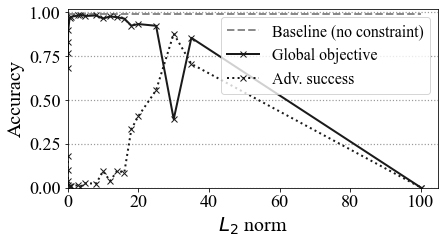

Skipped: e41_clipinf_0_00005_2_evaluation/test_accuracy
Skipped: e41_clipinf_0_00005_2_evaluation/adv_success


,round,norm,bound,test_accuracy_mean,test_accuracy_std,adv_success_mean,adv_success_std,baseline_mean,baseline_std
0,600,l8,0.00010,0.793604,0.001401,0.042089,0.004413,0.988851,0.000241
1,600,l8,0.00015,0.916907,0.000713,0.016129,0.000000,0.988851,0.000241
2,600,l8,0.00100,0.980080,0.000302,0.006129,0.000993,0.988851,0.000241
3,600,l8,0.00150,0.977780,0.000278,0.007097,0.001986,0.988851,0.000241
4,600,l8,0.00500,0.985204,0.000355,0.009194,0.002404,0.988851,0.000241
5,600,l8,0.01000,0.982443,0.000335,0.015968,0.001951,0.988851,0.000241
6,600,l8,0.01500,0.962695,0.001548,0.028226,0.004782,0.988851,0.000241
7,600,l8,0.02000,0.972059,0.001035,0.067419,0.021241,0.988851,0.000241
8,600,l8,0.02500,0.960528,0.004770,0.081290,0.027284,0.988851,0.000241
9,600,l8,0.03000,0.958217,0.005642,0.128226,0.024698,0.988851,0.000241


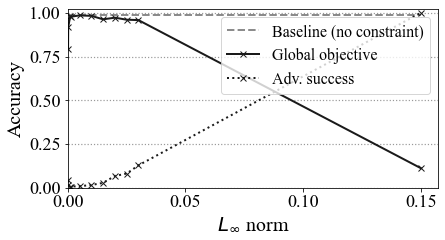

In [9]:
%run extract_histogram.py
%run plots.py

fig = norm_accuracy_tradeoff_plot(plotname="norm_accuracy_tradeoff_plot_l2", norm="l2")
display(fig)

fig = norm_accuracy_tradeoff_plot(plotname="norm_accuracy_tradeoff_plot_l8", norm="l8")
display(fig)
